In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import plotly.express as px

In [25]:
df = pd.read_csv('_data.csv',  index_col=0)

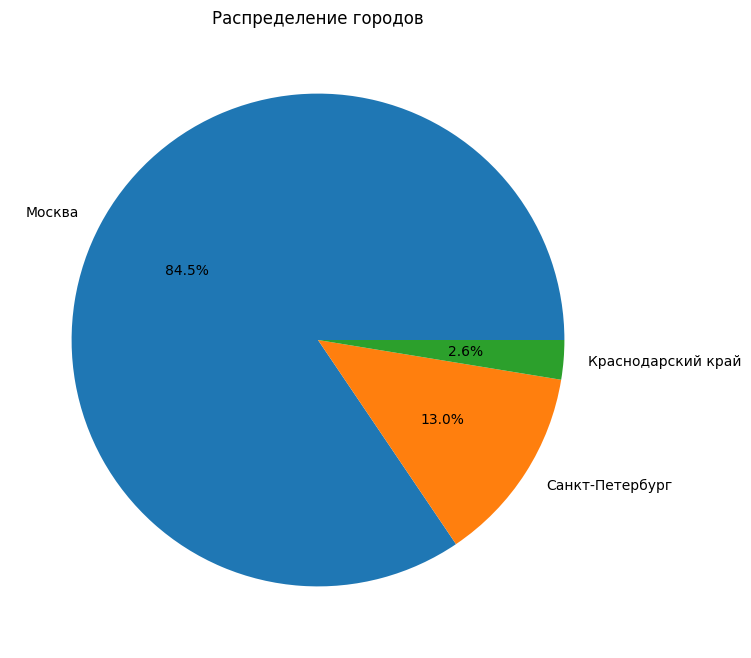

In [26]:
# в первой выгрузке мы обнаружили, что в датасете есть не только Москва. Смотрим, какеие есть ещё города
df['Город'] = df['Адрес'].str.split(',').str[0]
city_counts = df['Город'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Распределение городов')
plt.show()

In [27]:
df.drop(df[df['Город'] != 'Москва'].index, inplace=True) #оставляем только Москву

In [28]:
nan_count = df.isna().sum()
nan_count

ID  объявления                  0
Количество комнат             535
Тип                             0
Метро                         346
Адрес                           0
Площадь, м2                     0
Дом                             0
Парковка                    11174
Цена                            0
Телефоны                        0
Описание                        0
Ремонт                       2463
Площадь комнат, м2           7228
Балкон                       6630
Окна                         5150
Санузел                      2041
Можно с детьми/животными     4915
Дополнительно                 272
Название ЖК                 15281
Серия дома                  17646
Высота потолков, м           9202
Лифт                         4192
Мусоропровод                 8007
Ссылка на объявление            0
Город                           0
dtype: int64

In [29]:
unique_values = df['Балкон'].unique()
print(unique_values)

[nan 'Балкон (1)' 'Балкон (3)' 'Лоджия (1)' 'Балкон (2), Лоджия (3)'
 'Балкон (1), Лоджия (1)' 'Балкон (2)' 'Лоджия (2)'
 'Балкон (3), Лоджия (3)' 'Балкон (3), Лоджия (1)' 'Лоджия (3)'
 'Балкон (1), Лоджия (2)' 'Балкон (2), Лоджия (1)'
 'Балкон (2), Лоджия (2)' 'Балкон (4)' 'Лоджия (4)'
 'Балкон (4), Лоджия (4)' 'Балкон (1), Лоджия (4)'
 'Балкон (1), Лоджия (3)']


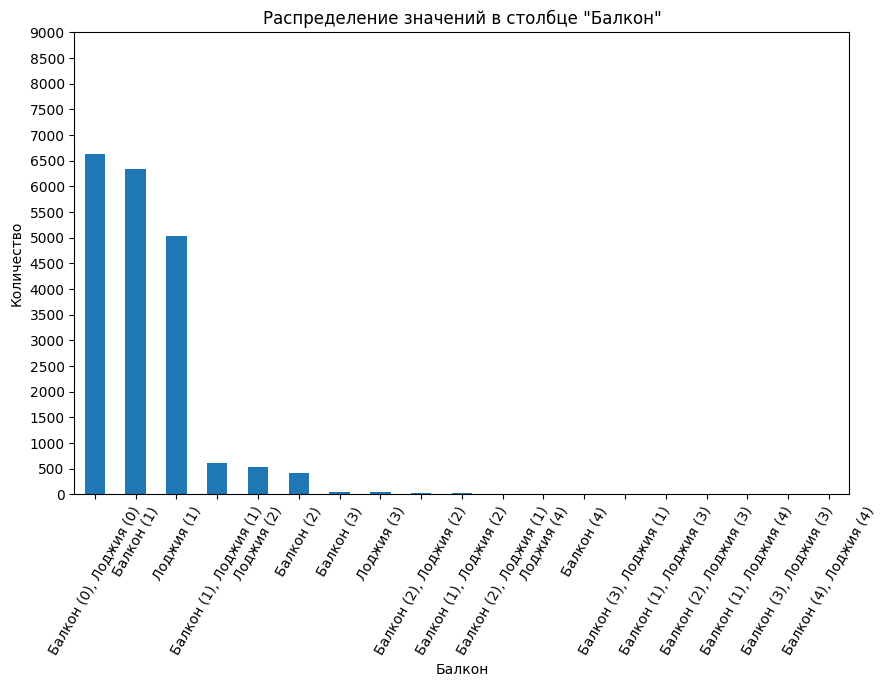

In [30]:
# Корректируем колонку "Балкон". Присваеваем значениям nan значение 'Балкон (0), Лоджия (0)'
df['Балкон'] = df['Балкон'].fillna('Балкон (0), Лоджия (0)')
balcony_counts = df['Балкон'].value_counts()

# Строим гистограмму
plt.figure(figsize=(10, 6))
balcony_counts.plot(kind='bar')
plt.title('Распределение значений в столбце "Балкон"')
plt.xlabel('Балкон')
plt.ylabel('Количество')
plt.xticks(rotation=60)
# Устанавливаем шаги на шкале у
plt.yticks(range(0, 9001, 500))
plt.show()

#График отражает, что в большинстве квартир имеются от 1 до 3 балконов или от 1 до 3 лоджии,
# остальные комбинации можно считать выбросами. Данные будут преобразованы на шаге Релиз 3.

In [31]:
unique_values = df['Окна'].unique()
print(unique_values)

[nan 'На улицу и двор' 'Во двор' 'На улицу']


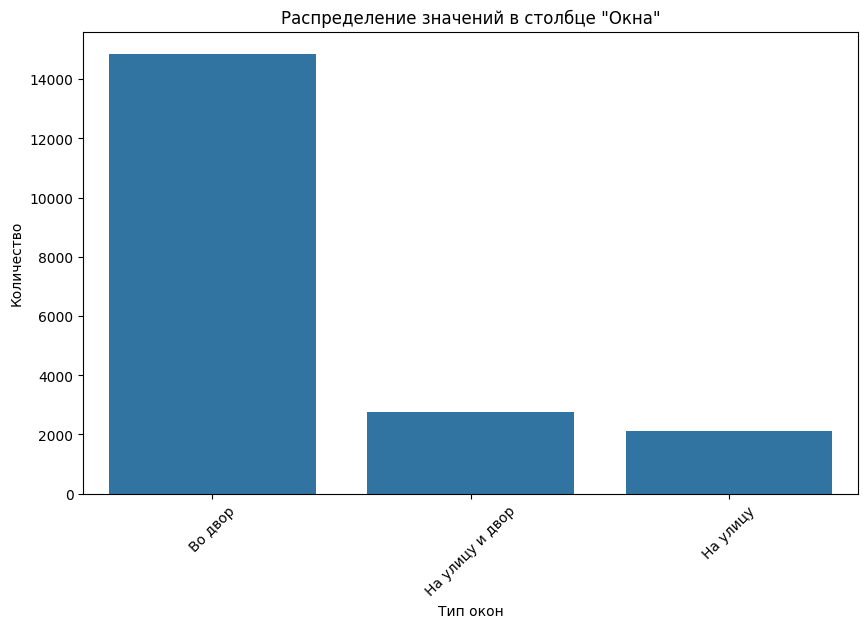

In [32]:
# Корректируем колонку "Окна". Присваеваем значениям nan значение 'Во двор'.
df['Окна'] = df['Окна'].fillna('Во двор')
# Подсчитываем количество значений в столбце "Окна"
window_counts = df['Окна'].value_counts()

# Создаем график с Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=window_counts.index, y=window_counts.values)
plt.title('Распределение значений в столбце "Окна"')
plt.xlabel('Тип окон')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.show()

In [33]:
unique_values = df['Санузел'].unique()
print(unique_values)

[nan 'Совмещенный (2), Раздельный (1)' 'Совмещенный (3)' 'Совмещенный (2)'
 'Совмещенный (1), Раздельный (1)' 'Совмещенный (1)'
 'Совмещенный (2), Раздельный (2)' 'Раздельный (2)' 'Раздельный (1)'
 'Раздельный (3)' 'Совмещенный (4)' 'Совмещенный (3), Раздельный (1)'
 'Раздельный (4)' 'Совмещенный (1), Раздельный (2)'
 'Совмещенный (2), Раздельный (4)' 'Совмещенный (1), Раздельный (3)'
 'Совмещенный (3), Раздельный (3)' 'Совмещенный (4), Раздельный (2)'
 'Совмещенный (2), Раздельный (3)' 'Совмещенный (4), Раздельный (1)'
 'Совмещенный (3), Раздельный (2)']


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

<Figure size 1200x600 with 0 Axes>

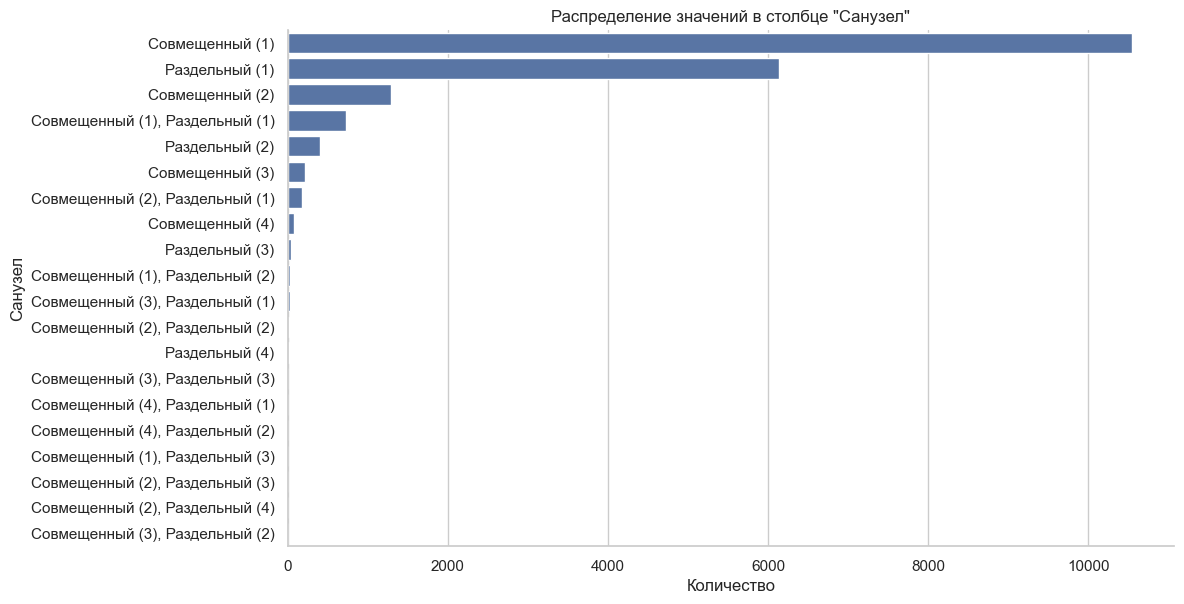

In [34]:
# Корректируем колонку "Санузел". Присваеваем значениям nan значение 'Совмещенный (1)'.
df['Санузел'] = df['Санузел'].fillna('Совмещенный (1)')
wc_counts = df['Санузел'].value_counts()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Устанавливаем стиль графика
sns.catplot(x="count", y="Санузел", data=wc_counts.reset_index(), kind="bar", height=6, aspect=2)

plt.title('Распределение значений в столбце "Санузел"')
plt.xlabel('Количество')
plt.ylabel('Санузел')
plt.xticks(rotation=0)

# plt.show()

# График отражает выбросы, которые будут удалены на этапе Релиз 3.

In [35]:
unique_values = df['Можно с детьми/животными'].unique()
print(unique_values)

['Можно с детьми, Можно с животными' 'Можно с детьми' 'Можно с животными'
 nan]


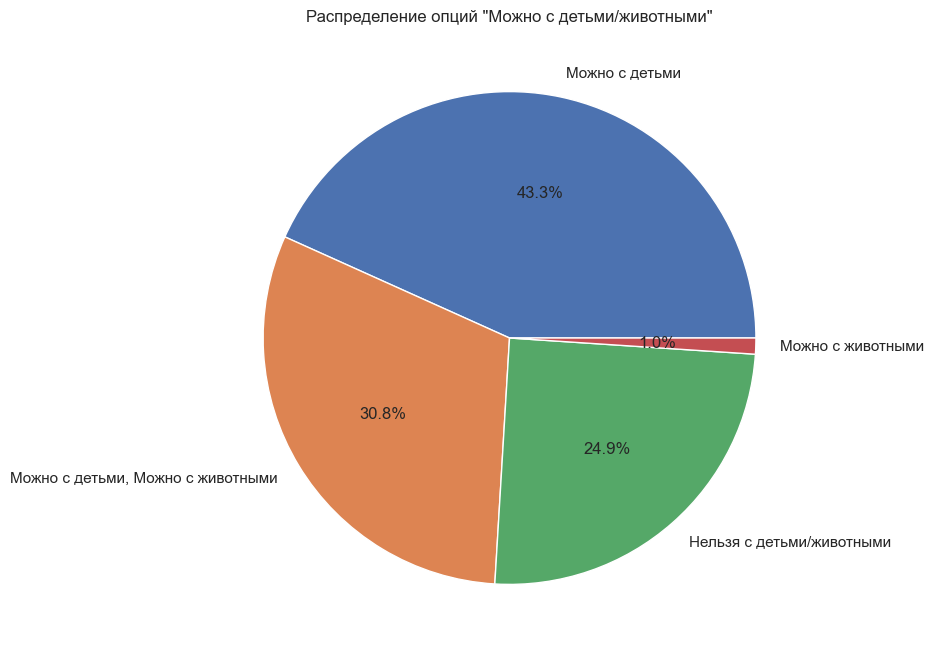

In [36]:
# Корректируем колонку "Можно с детьми/животными". Присваеваем значениям nan значение 'Нельзя с детьми/животными', т.к. согласно анализу жвых объявлений на ЦИАН именно это и означает отсутствие информации о разрешенных жильцах помимо взрослых
df['Можно с детьми/животными'] = df['Можно с детьми/животными'].fillna('Нельзя с детьми/животными')
options = df['Можно с детьми/животными'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(options, labels=options.index, autopct='%1.1f%%')
plt.title('Распределение опций "Можно с детьми/животными"')
plt.show()


In [38]:
unique_values = df['Дополнительно'].unique()

In [39]:
#  Создаем словарь, определяющий соответствие между столбцами и значениями для разбивки столбца "Дополнительно"

value_mapping = {
    1: 'Мебель на кухне',
    2: 'Ванна',
    3: 'Душевая кабина',
    4: 'Стиральная машина',
    5: 'Кондиционер',
    6: 'Посудомоечная машина',
    7: 'Телевизор',
    8: 'Холодильник',
    9: 'Интернет',
    10: 'Телефон'
}

# Создаем новые столбцы, используя словарь для соответствия
for i in range(1, 11):
    col_name = str(i)
    df[col_name] = df['Дополнительно'].apply(lambda x: value_mapping[i] if isinstance(x, str) and value_mapping[i] in x else '0')

# Уберите столбец 'Дополнительно', если он больше не нужен
df = df.drop('Дополнительно', axis=1)
df.head(5)



,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,1,2,3,4,5,6,7,8,9,10
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,0
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,0,Посудомоечная машина,Телевизор,Холодильник,Интернет,0


In [40]:
# Создаем словарь с новыми именами столбцов
new_column_names = {
    '1': 'Мебель на кухне',
    '2': 'Ванна',
    '3': 'Душевая кабина',
    '4': 'Стиральная машина',
    '5': 'Кондиционер',
    '6': 'Посудомоечная машина',
    '7': 'Телевизор',
    '8': 'Холодильник',
    '9': 'Интернет',
    '10': 'Телефон'
}

# Переименуем столбцы с использованием метода .rename()
df = df.rename(columns=new_column_names)
df.head(3)


,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,0
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон


По вновь собранным столбцам на этапе релиза 3 и преобразовании всех столбцов датасета буду отрждать зависимости наличия корреляции между наличием этих 'amenities' и ценой аренды.

In [42]:
df['Парковка'].fillna('уличная', inplace=True) #пропущенные значения заполняются уличной парковкой, т.к. по опыту отсутствие указанной парковки как раз означает отсутствие возможности припарковать ТС внутри дома или территории
df.rename(columns={'Парковка': 'parking'}, inplace=True)
df['parking'].value_counts()

parking
уличная           11174
наземная           5283
подземная          2466
открытая            713
многоуровневая      100
на крыше              1
Name: count, dtype: int64

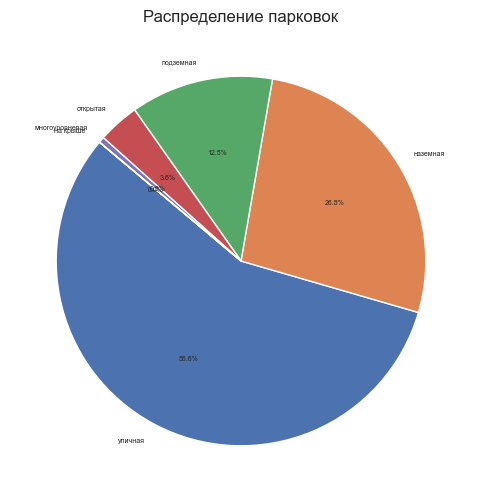

In [43]:
parking_counts = df['parking'].value_counts()
# Создание пай-чарта
plt.figure(figsize=(6, 6))
plt.pie(parking_counts, labels=parking_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 5})
# Добавление заголовка
plt.title('Распределение парковок')
# Отображение пай-чарта
plt.show()

In [44]:
df['Мусоропровод'].value_counts()

Мусоропровод
Да     10262
Нет     1468
Name: count, dtype: int64

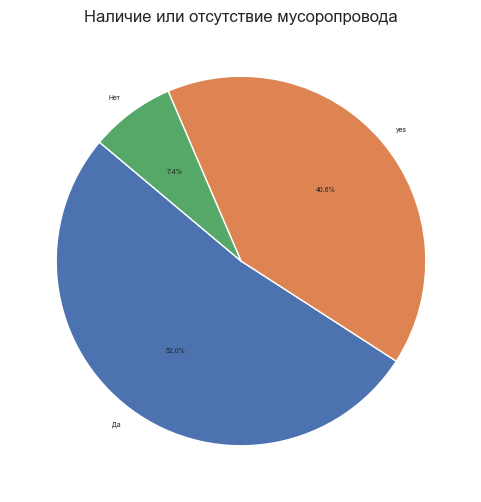

In [45]:
df['Мусоропровод'].fillna('yes', inplace=True) #пропущенные значения заполняются модой, т.к. у мусоропровода есть два состояния — либо он если, либо его нет, и в данной выборке получается, что более 50% выборки с мусоропроводами — получается, что дефолтное состояние дома в Москве — наличие мусоропровода
df.rename(columns={'Мусоропровод': 'garbage_chute'}, inplace=True)
count_chute = df['garbage_chute'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(count_chute, labels=count_chute.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 5})
plt.title('Наличие или отсутствие мусоропровода')
plt.show()

In [50]:
df['Этаж'] = df['Дом'].str.extract(r'(\d+)/').astype(int) # делаем отдельную колонку с этажностью домов. Согласно законадательству, в доме обязан быть лифт, если в доме больше 5 этажей
# Задаются англоязычные значения, потому что на данном этапе определить, какого конкретно типа должен быть лифт, невозможно + для того, чтобы видеть, какие конкретно данные были изменены
df['Лифт'] = np.where((df['Этаж'] > 5) & (df['Лифт'].isna()), 'Yes', df['Лифт']) # если в доме больше 5 этажей, в нём обязан быть лифт
df['Лифт'] = np.where((df['Этаж'] <= 5) & (df['Лифт'].isna()), 'No', df['Лифт']) # если в доме меньше 5 этажей, в нём может не быть лифта
df

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,parking,Цена,Телефоны,...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,Этаж
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,5
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,0,5
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,5
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон,5
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",уличная,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,Ванна,Душевая кабина,Стиральная машина,0,Посудомоечная машина,Телевизор,Холодильник,Интернет,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,уличная,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,...,Ванна,0,Стиральная машина,Кондиционер,0,0,Холодильник,Интернет,0,10
23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",уличная,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,...,Ванна,0,Стиральная машина,0,0,Телевизор,Холодильник,0,0,5
23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",уличная,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,...,0,Душевая кабина,Стиральная машина,Кондиционер,0,0,Холодильник,Интернет,0,5
23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,...,Ванна,0,Стиральная машина,Кондиционер,Посудомоечная машина,0,Холодильник,0,0,8


In [55]:
df['Материал дома'] = df['Дом'].str.split(',').str[1].str.strip()
df_material = df.dropna(subset=['Материал дома'])
mean_heights = df_material.groupby('Материал дома')['Высота потолков, м'].mean().reset_index() # берем материал дома в качестве коррелирующей с высотой потолков переменной, создаём словарь из средних значений для каждого из материалов
count_per_material = df_material['Материал дома'].value_counts().reset_index()
result_df = pd.merge(count_per_material, mean_heights, on='Материал дома')
# создаём новый датафрейм без значений NaN в колонке "Материал дома"
df_material = df.dropna(subset=['Материал дома'])
mean_heights_dict = dict(zip(result_df['Материал дома'], result_df['Высота потолков, м']))
# заполняем пропущенные значения в столбце 'Высота потолков, м' средними значениями из словаря. Здесь пока заполняем только те строки, в которых есть материал дома
df['Высота потолков, м'] = df.apply(lambda row: mean_heights_dict.get(row['Материал дома']) if pd.isna(row['Высота потолков, м']) else row['Высота потолков, м'], axis=1)
df['Высота потолков, м'].isnull().sum() #Здесь количество NaN уже снизилось с 9022 до 2018. Нужно заполнить только оставшиеся Nan в высоте потолков

2018

In [56]:
material_counts = df['Материал дома'].value_counts().reset_index()
material_counts.columns = ['Материал дома', 'Количество']
material_counts

,Материал дома,Количество
0,Панельный,6679
1,Кирпичный,3696
2,Монолитный,3615
3,Блочный,1689
4,Монолитно-кирпичный,872
5,Сталинский,141
6,старый фонд,68
7,Деревянный,5
8,Щитовой,1


In [57]:
#так как мы используем для определения высоты потолков материал дома, а в оставшихся пустых значенииях по высоте потолков нулевым также является и материал дома, то оставшиеся пропуски заполняются просто средним значением
mean_height = df['Высота потолков, м'].mean()
df['Высота потолков, м'] = df['Высота потолков, м'].fillna(mean_height)
df['Высота потолков, м'].isnull().sum() # тут нулевое количество пропусков

0

In [68]:
df = df.drop("Материал дома", axis=1)
#мы не нашли, каким образом нам может помочь серия дома, потому что данных слишком мало и слишком много типов этих серий домов, поэтому серию дома мы просто удаляем
df = df.drop("Серия дома", axis=1)
nan_count = df.isna().sum()
nan_count 

KeyError: "['Материал дома'] not found in axis"

In [65]:
# ЦИАН автоматически присваивает название ЖК тем домам, которые находятся по адресу определенного ЖК, поэтому мы можем быть уверены: если в ЖК NaN, то дом просто не входит в состав ЖК
df['Название ЖК'] = df['Название ЖК'].replace({pd.NA: 0})
df['Название ЖК'] = df['Название ЖК'].apply(lambda x: 1 if x != 0 else 0)
# если нужно перевести значения в тип int (целые числа):
# df['Название ЖК'] = df['Название ЖК'].astype(int)

Уникальные значения:
[1 0]
Количество каждого значения:
Название ЖК
0    15281
1     4456
Name: count, dtype: int64


In [69]:
nan_count = df.isna().sum()
nan_count 

ID  объявления                 0
Количество комнат            535
Тип                            0
Метро                        346
Адрес                          0
Площадь, м2                    0
Дом                            0
parking                        0
Цена                           0
Телефоны                       0
Описание                       0
Ремонт                      2463
Площадь комнат, м2          7228
Балкон                         0
Окна                           0
Санузел                        0
Можно с детьми/животными       0
Название ЖК                    0
Высота потолков, м             0
Лифт                           0
garbage_chute                  0
Ссылка на объявление           0
Город                          0
Мебель на кухне                0
Ванна                          0
Душевая кабина                 0
Стиральная машина              0
Кондиционер                    0
Посудомоечная машина           0
Телевизор                      0
Холодильни